# Week 2 - Introduction to machine learning with scikit-learn

In this tutorial, we introduce building machine learning models with scikit-learn package in python.

In your virtual environment, install the scikit-learn package for working on Machine Learning in python:
`conda install -c conda-forge scikit-learn`    
Refer the <a href=https://scikit-learn.org/stable/install.html>documentation</a>  (if required)

Two key methods of all the Machine Learning models:
1. `fit` : This method will train the model from the data.
 
    We can illustrate the fit mechanism as follows:
    ![Predictor fit diagram](https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/master/figures/api_diagram-predictor.fit.svg)

    The method `fit` is composed of two elements: (i) a **learning algorithm** and (ii) some **model states**. The learning algorithm takes the training data and training target as input and sets the model states. These model states will be used later to predict (classifiers and regressors) or transform data (for transformers).
    
    Both the learning algorithm and the type of model states are specific to each type of model.      
                
                
                
2. `predict`: This method will produce class predictions for an array of test data.

    We can illustrate the prediction mechanism as follows:

    ![Predictor predict diagram](https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/master/figures/api_diagram-predictor.predict.svg)

    To predict, a model uses a **prediction function** that will use the input
    data together with the model states. As for the learning algorithm and the
    model states, the prediction function is specific for each type of model.
    
*<a href=https://inria.github.io/scikit-learn-mooc/python_scripts/02_numerical_pipeline_introduction.html>Source</a> of the images

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">In scikit-learn documentation, data is commonly named X and target is commonly called y. Hence, we will be following the same notations here.</p>
</div>


Now, let's get started...

### Import Packages

In [1]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
# to make the plots display inline 
%matplotlib inline 

In [2]:
# import wine dataset that is given by scikit-learn, 'as_frame=True' ensures to return the data as a dataframe
wine = datasets.load_wine(as_frame=True)

In [3]:
X = wine.data
print(f"The dataset contains {X.shape[0]} samples and "f"{X.shape[1]} features")
X.head()

The dataset contains 178 samples and 13 features


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
y = wine.target
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

In [5]:
y.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

The dataset contains 3 target variables denoted as 0, 1 and 2. 

## Fit a model and make predictions

Let's build a classification model using the "K-nearest neighbors" strategy. To predict the target of a new sample, a k-nearest neighbors takes into account its k closest samples in the training set and predicts the majority target of these samples.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X, y)

KNeighborsClassifier()

Using our model, let's make some predictions on the same dataset.

In [7]:
y_predicted = model.predict(X)

In [8]:
y_predicted[:5]

array([0, 0, 0, 0, 2])

In [9]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

...and we could even check if the predictions agree with the real targets:

In [10]:
y[:5] == y_predicted[:5]

0     True
1     True
2     True
3     True
4    False
Name: target, dtype: bool

In [11]:
print(f"Number of correct prediction: "f"{(y[:5] == y_predicted[:5]).sum()} / 5")

Number of correct prediction: 4 / 5


Here, we see that our model makes a mistake when predicting for the fifth sample.
To get a better assessment, we can compute the average success rate over the entire data.

In [12]:
accuracy_score(y, y_predicted)

0.7865168539325843

But, can this evaluation be trusted?

## Train-test data split

When building a machine learning model, it is important to evaluate the trained model on data that was not used to fit it, as generalization is more than memorization (meaning we want a rule that generalizes to new data, without comparing to data we memorized). It is harder to conclude on never-seen instances than on already seen ones.

Thus, the most basic evaluation involves:

* splitting our dataset into two subsets: a **training set** and a **testing set**;
* fitting the model on the training set;
* estimating the error of the model on the training set (training error);
* estimating the error of the model on the testing set (testing error).

So let's split our dataset.

In [13]:
from sklearn.model_selection import train_test_split

# provide an argument to 'random_state' to get reproducible results, 
# refer https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) 
# train_test_split returns a tuple
# y_test returns predicted values


Fit the model..

In [14]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_predicted = model.predict(X_train)
accuracy_score(y_train, y_predicted)

0.8270676691729323

We observe the same phenomena as in the previous experiment: our model memorized the training set. However, we now compute the testing error.

In [16]:
y_predicted = model.predict(X_test)
accuracy_score(y_test, y_predicted)

0.6888888888888889

It is clear that the model performs better on the training data than testing data.

 ## Handling categorical features

Some implementation of machine learning algorithms require all input and output variables to be numeric, for example, scikit-learn. Therefore, categorical features have to converted to numeric. There are multiple ways to achieve that in sklearn. 

1. <a href = https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder>Label encoding</a> : Encode target labels with value between 0 and n_classes-1
2. <a href = https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder>One-hot encoding</a> : Encode categorical features as a one-hot numeric array.
3. <a href = https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder>Ordinal encoding</a> : Encode categorical features as an integer array

In [17]:
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

In [18]:
data = pd.read_csv('adult_census_cleaned.csv')
data.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,native-region
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,Low,Low,Medium,<=50K,North_America
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,Low,Low,Low,<=50K,North_America
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,Low,Low,Medium,<=50K,North_America
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,Low,Low,Medium,<=50K,North_America
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Low,Low,Medium,<=50K,Central_America


Let's say a machine learning model has to predict the `income` of the individual based on the rest of the features in this dataset. The features consists of both categorical and numerical values. So, let's see how to transform the categorical features into numeric values.

In [19]:
# Select features based on their data type
categorical_columns_selector = selector(dtype_include=['object'])
categorical_columns = categorical_columns_selector(data)
data_categorical = data[categorical_columns]
data_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,native-region
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,Low,Low,Medium,<=50K,North_America
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,Low,Low,Low,<=50K,North_America
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,Low,Low,Medium,<=50K,North_America
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,Low,Low,Medium,<=50K,North_America
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Low,Low,Medium,<=50K,Central_America


In [20]:
target = data_categorical.pop('income')
target

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
26835    <=50K
26836     >50K
26837    <=50K
26838    <=50K
26839     >50K
Name: income, Length: 26840, dtype: object

In [21]:
target.value_counts()

<=50K    19974
>50K      6866
Name: income, dtype: int64

#### Label Encoder

In [41]:
label_encoder = LabelEncoder()
# transform method is similar to predict for 
target_encoded = pd.DataFrame(label_encoder.fit_transform(target), columns=['income>50K']) # returns array-like of shape target.shape[0]
target_encoded

,income>50K
0,0
1,0
2,0
3,0
4,0
...,...
26835,0
26836,1
26837,0
26838,0


In [42]:
target_encoded.value_counts()

income>50K
0             19974
1              6866
dtype: int64

The target labels are converted to numeric values using the `LabelEncoder`

In [24]:
# listing the different target classes
list(label_encoder.classes_)

['<=50K', '>50K']

#### Ordinal encoding

In [25]:
data_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-region
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,Low,Low,Medium,North_America
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,Low,Low,Low,North_America
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,Low,Low,Medium,North_America
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,Low,Low,Medium,North_America
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Low,Low,Medium,Central_America


The `education` column contains a list of categorical data that can be ordered based on the level of education. This column can be converted to a numerical column using ordinal encoding as follows: 

In [26]:
ordinal_encoder = OrdinalEncoder()
education_encoded = ordinal_encoder.fit_transform(data_categorical[['education']])
education_encoded[:5] #displaying the first 5 values in the array

array([[ 9.],
       [ 9.],
       [11.],
       [ 1.],
       [ 9.]])

In [27]:
ordinal_encoder.categories_

[array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
        'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
        'Masters', 'Preschool', 'Prof-school', 'Some-college'],
       dtype=object)]

The `education` column has been converted to contain numeric values for all the different categories. However, the original dataset contains `education-num` column which is similar to the one that we have encoded, but with a more meaningful order.

By default, `OrdinalEncoder` uses a lexicographical strategy to map string category labels to integers. This strategy is arbitrary and often meaningless. For instance, suppose the dataset has a categorical variable named `"risk-level"` with categories such as "Low", "Medium", "High". We would like the integer representation to respect the meaning of the risk levels by mapping them to increasing integers such as `0, 1, 2`. However, the lexicographical strategy used by default would map the labels "Low", "Medium", "High" to 1, 2, 0 by following the alphabetical order. 

The OrdinalEncoder class accepts a categories constructor argument to pass categories in the expected ordering explicitly as shown below.

In [28]:
ordinal_encoder = OrdinalEncoder(categories=[['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                                             'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 
                                              'Prof-school', 'Doctorate']])
education_encoded = ordinal_encoder.fit_transform(data_categorical[['education']])
education_encoded[:5] #displaying the first 5 values in the array

array([[12.],
       [12.],
       [ 8.],
       [ 6.],
       [12.]])

Now, the order of the education encoded column is different than the default integers assigned initially. 

In [29]:
capital_gain_encoder = OrdinalEncoder(categories=[['Low', "Medium", "High"]])
capital_gain_encoded = pd.DataFrame(capital_gain_encoder.fit_transform(data_categorical[['capital-gain']]), 
                                    columns=['capital-gain'])
capital_gain_encoded[:5] #displaying the first 5 values in the array

,capital-gain
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [30]:
capital_loss_encoder = OrdinalEncoder(categories=[['Low', "Medium", "High"]])
capital_loss_encoded = pd.DataFrame(capital_loss_encoder.fit_transform(data_categorical[['capital-loss']]), 
                                    columns=['capital-loss'])
capital_loss_encoded[:5] #displaying the first 5 values in the array

,capital-loss
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [31]:
hours_per_week_encoder = OrdinalEncoder(categories=[['Low', "Medium", "High"]])
hours_per_week_encoded = pd.DataFrame(hours_per_week_encoder.fit_transform(data_categorical[['hours-per-week']]),
                                      columns=['hours-per-week'])
hours_per_week_encoded[:5] #displaying the first 5 values in the array

,hours-per-week
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0


#### One-hot encoding

Using Ordinal encoding makes sense when the categorical data is ordered. If the data is not ordered, then one-hot encoding can be used. `OneHotEncoder` is an alternative encoder that prevents the downstream models to make a false assumption about the  ordering of categories. For a given feature, it will create as many new columns as there are possible categories. For a given sample, the value of the column corresponding to the category will be set to `1` while all the columns of the other categories will be set to `0`. 

In [32]:
data_categorical.head()

,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-region
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,Low,Low,Medium,North_America
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,Low,Low,Low,North_America
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,Low,Low,Medium,North_America
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,Low,Low,Medium,North_America
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Low,Low,Medium,Central_America


In [33]:
onehot_encoder = OneHotEncoder(sparse=False)
categories_encoded = onehot_encoder.fit_transform(data_categorical[["workclass", "marital-status", "occupation", 
                                                                      "relationship", "race", "sex", "native-region"]])
categories_encoded[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
        1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
        1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
        1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 

In [34]:
print(f"The encoded dataset contains {categories_encoded.shape[1]} features")

The encoded dataset contains 50 features


Let's wrap this NumPy array in a dataframe with informative column names as provided by the encoder object:

In [35]:
columns_encoded = onehot_encoder.get_feature_names(data_categorical[["workclass", "marital-status", "occupation", 
                                                                      "relationship", "race", "sex", "native-region"]].columns)
categorical_columns = pd.DataFrame(categories_encoded, columns=columns_encoded)
categorical_columns[:5]

c:\Users\Sean\Documents\Anaconda Install\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,...,race_White,sex_Female,sex_Male,native-region_Asia_Central,native-region_Asia_East,native-region_Central_America,native-region_Europe_East,native-region_Europe_West,native-region_North_America,native-region_South_America
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


All the categorical columns are converted using either ordinal or one-hot encoder. 

## Data Normalization

The `age` feature has a wide range of 20-95 while most of the other features lie within a range of 0-1 (for the categorical features). Therefore, we shall perform min-max normalization on `age`. 

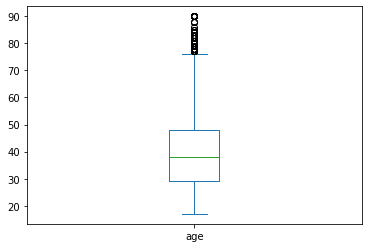

In [36]:
data['age'].plot(kind='box');

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler =  MinMaxScaler(feature_range=(0, 1))
age_scaled = pd.DataFrame(scaler.fit_transform(data[['age']].values), columns=['age'])

<AxesSubplot:>

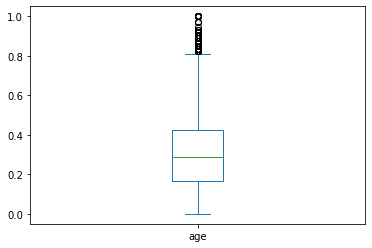

In [38]:
age_scaled.plot(kind='box')

The distribution of the values is the same after normalization with `Min-max scaler`. Only the range has changed.

In [39]:
# concatenate all the  columns
dataframe_normalized_encoded = pd.concat([age_scaled, data['education-num'], categorical_columns, capital_gain_encoded, 
                                          capital_loss_encoded, hours_per_week_encoded, target_encoded], axis=1)
dataframe_normalized_encoded[:2]

,age,education-num,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,...,native-region_Asia_East,native-region_Central_America,native-region_Europe_East,native-region_Europe_West,native-region_North_America,native-region_South_America,capital-gain,capital-loss,hours-per-week,income>50K
0,0.301370,13,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,0.452055,13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


The normalized and encoded data of the adult-census dataset contains 55 features and the target variable is `income>50K`. 

In [40]:
dataframe_normalized_encoded.to_csv("adult_census_normalized_encoded.csv", index=False)